In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
import re
import gc

In [2]:
df = pd.read_csv('data/complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


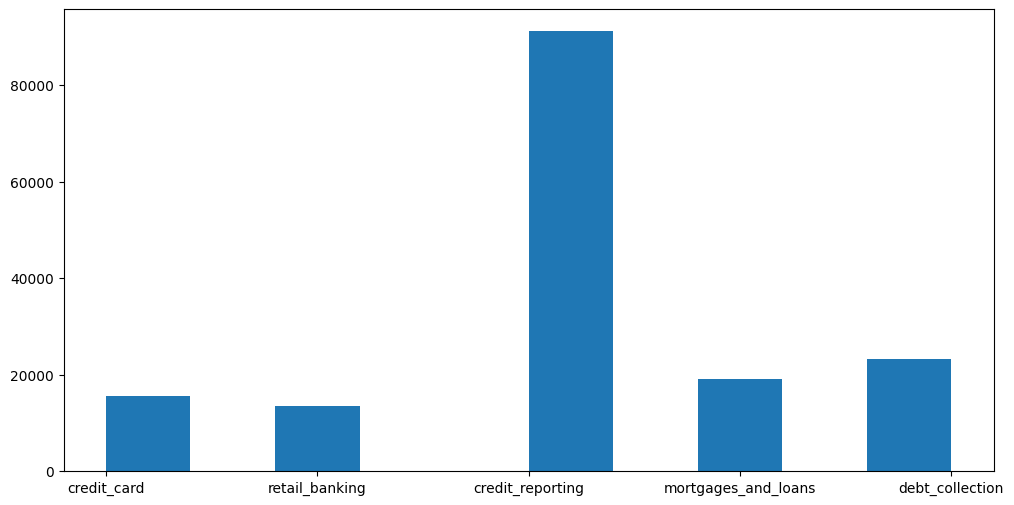

In [4]:
plt.figure(figsize=(12,6))
plt.hist(df['product'])
plt.show()

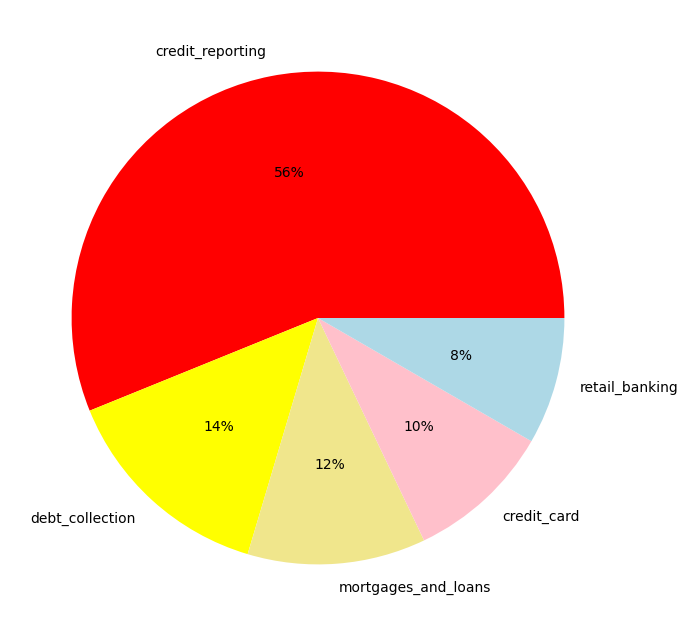

In [5]:
x = df['product'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x,labels=x.index, autopct='%1.0f%%',colors=['red','yellow','khaki','pink','lightblue'])
plt.show()

<font size = 3>
    <h2>Unbalanced Data</h2>
    <ul>
        <li>This is a unbalanced dataset because nearly half (56%) of the classification is of credit reporting. </li>
        <li>The other classifications are nearly equally distributed among themselves. </li>
        <li>But we will use Classification report and F1 score to see whether we actually perform well with this unbalanced data.</li>
        <li> we might be good to go as it is because we have multiclass classification as opposed to binaray classification.</li>
    

### we import custom stopwords

In [6]:
with open('data/stopwords.txt','r') as file:
    custom_stopwords = file.read().split()

In [7]:
custom_stopwords[:10]

['0o', '0s', '3a', '3b', '3d', '6b', '6o', 'a', 'a1', 'a2']

In [8]:
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag,pos_tag_sents
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
def word_cleaning_stemming(data,notification):
    n = 0
    m = 0
    
    ps = PorterStemmer()
    record = []
    for y in data:
        if n>=notification:
            n=0
            m+=1
            print(notification*m)

        n+=1
        if isinstance(y,str):
            row = []
            for ii in [word_tokenize(i) for i in sent_tokenize(y)][0]:
                row.append(ps.stem(ii))
            record.append(row)
            
        else:
            record.append(np.nan)
    return record

In [10]:
stopwords = stopwords.words('english')+custom_stopwords
stopwords[:10],len(stopwords)

(['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're"],
 1339)

<font size = 3>
    I am imploying custom function for stemming. I am not using lemmatization as it is resource intensive and provides little advantage for classification.

In [11]:
record = word_cleaning_stemming(df['narrative'],1000)
gc.collect()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

0

In [12]:
len(record),len(df)

(162421, 162421)

In [13]:
n = 100000
record[n][:10],df['narrative'][n]

(['loan',
  'got',
  'sold',
  'rushmor',
  'loan',
  'manag',
  'collect',
  'agent',
  'never',
  'miss'],
 'loan got sold rushmore loan management collection agent never miss late payment ever kind contacted company first time asked make payment go principal said sure call would auto started making double payment per month checked couple month later find applied future payment paid time month due payment due three month waited next due date cause would answer call next time payment applied interest principal wife credit score went shopping changing lower rate better service done wrong want known reported')

In [14]:
df['record'] = record
del record
gc.collect()

0

In [15]:
df.head()

,Unnamed: 0,product,narrative,record
0,0,credit_card,purchase order day shipping amount receive pro...,"[purchas, order, day, ship, amount, receiv, pr..."
1,1,credit_card,forwarded message date tue subject please inve...,"[forward, messag, date, tue, subject, pleas, i..."
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,"[forward, messag, cc, sent, friday, pdt, subje..."
3,3,credit_reporting,payment history missing credit report speciali...,"[payment, histori, miss, credit, report, speci..."
4,4,credit_reporting,payment history missing credit report made mis...,"[payment, histori, miss, credit, report, made,..."


In [16]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [17]:
from gensim.models import Word2Vec

In [18]:
model = Word2Vec(
    window=10,
    min_count=2,
    workers=2,
    vector_size = 100
)



In [19]:
model.build_vocab(df['record'], progress_per=1000)

In [20]:
model.train(df['record'], total_examples=model.corpus_count, epochs=model.epochs)
gc.collect()

0

## we train a word2vec model

In [21]:
# model.save('data/word2vec.model')
# model = Word2Vec.load('data/word2vec.model')

In [22]:
model.wv.most_similar(positive='payment')

[('pmt', 0.7144526839256287),
 ('monthli', 0.6287692189216614),
 ('biweekli', 0.5944775342941284),
 ('autopay', 0.5655791163444519),
 ('arrear', 0.5549678206443787),
 ('principl', 0.5470407009124756),
 ('consecut', 0.5395421385765076),
 ('arrang', 0.5299505591392517),
 ('ontim', 0.5072011947631836),
 ('draft', 0.5001259446144104)]

In [23]:
dictionary = model.wv.key_to_index

In [24]:
list(dictionary.keys())[5]

'call'

In [25]:
dictionary['payment']

4

In [26]:
model.wv.get_index('payment')

4

In [27]:
len(model.wv.get_vector(4))

100

In [28]:
from tensorflow.keras.utils import pad_sequences


/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/home/heramb96/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared

In [29]:
length_500 = []
length = []
for i in df['narrative']:
    
    x = len(i.split())
    length.append(x)
    if x<=500:
        length_500.append(x)

In [30]:
len(length_500)/len(df)

0.9891694528079995

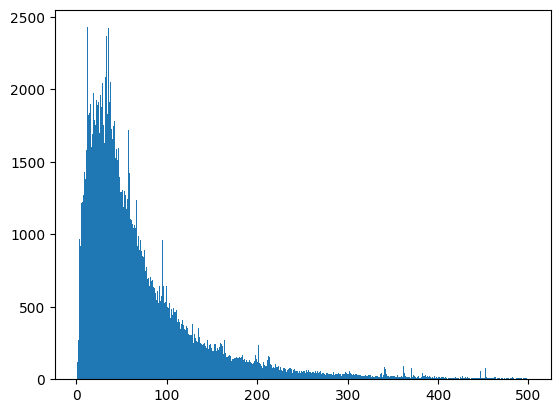

In [31]:
plt.hist(length_500,bins=500)
plt.show()

<font size = 3>
    <h2>Compromise because of limited resources </h2>
    <ul>
        <li>I am going to make a compromise here by only taking first 500 words from each message, as such messages consist of most of the dataset (98%).</li>
        <li>Importantly, I am not dropping the sentences that are longer than 500 words, but instead I am just taking the first 500 words from them.</li>
        

In [32]:
from sklearn.model_selection import train_test_split

## creating a list to store the encoded words

In [33]:
record = []

for row in df['record']:
    line = []
    if len(row)>200:
        row = row[:200]
    
    
    for i in row:
        try:
            line.append(np.array(model.wv.get_vector(model.wv.get_index(i)),dtype=np.float16))
        except:
            pass
        
    
    if len(line)>0:
        record.append(pad_sequences(np.array(line,dtype=np.float16).reshape(1,len(line),100),maxlen=200,padding='pre',dtype=np.float16)[0])
    else:
        record.append(pad_sequences(np.zeros((200,100),dtype=np.float16).reshape(1,200,100),maxlen=200,padding='pre',dtype=np.float16)[0])
    
X = np.array(record,dtype=np.float16)
del record 
gc.collect()

# with open('data/X.pkl','rb') as file:
#     X = pickle.load(file)


y = pd.get_dummies(df['product'])
    
gc.collect()

0

In [34]:
df['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

<font size = 4>
    <br>
    <br>
    <b>creating function for hyperperameter tuning, that is, to decide the number of units for the LSTM model as well as optimum number of layers

In [35]:
hyperparameter_test = []
for i in df['product'].unique():
    hyperparameter_test = hyperparameter_test+list(df[df['product']==i].index[:5000])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X[hyperparameter_test], np.array(y)[hyperparameter_test], test_size=0.33, random_state=42)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

In [39]:
def multiclass_binary_conversion(x,class_n):
    y = []
    for i in x:
        n = 0
        for ii in i:
            if ii == max(i):
                break
            n+=1
        p = []
        for t in range(class_n):
            if t==n:
                p.append(1)
            else:
                p.append(0)
        y.append(p)
                
    return np.array(y)

In [40]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=0,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [41]:
def optimise_hyperperameters(X__train,y__train,X__test,y__test,lstm_units,y_len):
    score = []
    f1 = []
    ls = lstm_units
    history_dict = []
    
    
    for units in lstm_units:
        print('model number : ',units)
              
        lstm_model = Sequential()
        
        
        if units[0]>1:
            for i in range(units[0]-1):
                lstm_model.add(LSTM(units[1],return_sequences=True))
        
        lstm_model.add(LSTM(units[1]))
        lstm_model.add(Dense(y_len,activation='softmax'))
        lstm_model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
        hist = lstm_model.fit(X__train,y__train,validation_split=0.3,epochs=500,callbacks=callback)

        y__pred = multiclass_binary_conversion(lstm_model.predict(X__test),y_len)
        score.append(np.mean(correct_classification(y__test,y__pred)))
        
        f = []
        
        for i in range(y_len):
            f.append(f1_score(y__test[:,i],y__pred[:,i]))
        
        f1.append(f)
              
        history_dict.append(hist.history)
        
        gc.collect()
        print('\n\n')
        
    return {'lstm_units':['_'.join([str(ii) for ii in i]) for i in ls],'score':score,'f1':f1,'history':history_dict}
        

In [42]:
def correct_classification(y_true,y_pred):
    y = []
    for i,ii in zip(y_true,y_pred):
        if list(i) == list(ii):
            y.append(1)
        else:
            y.append(0)
    return y
        

In [43]:
optimised = optimise_hyperperameters(X_train,y_train,X_test,y_test,
                                     lstm_units=[
                                     [1,10],[1,50],[1,100],[1,150],[1,300],[1,350],[1,400],[1,450],[1,500],
                                    [2,10],[2,50],[2,100],[2,150],[2,200],[2,250],[2,300],[2,350],[2,400]
                                     
                                     ],y_len=5)

model number :  [1, 10]


2023-01-14 18:17:49.014595: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 938000000 exceeds 10% of free system memory.


Epoch 1/500
367/367 [==============================] - 30s 75ms/step - loss: 1.4274 - accuracy: 0.3951 - val_loss: 1.2618 - val_accuracy: 0.5007
Epoch 2/500
367/367 [==============================] - 27s 74ms/step - loss: 1.0987 - accuracy: 0.5750 - val_loss: 0.9738 - val_accuracy: 0.6384
Epoch 2: early stopping


2023-01-14 18:18:46.932832: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 660000000 exceeds 10% of free system memory.


258/258 [==============================] - 5s 16ms/step



model number :  [1, 50]
Epoch 1/500


2023-01-14 18:18:53.030030: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 938000000 exceeds 10% of free system memory.


367/367 [==============================] - 47s 122ms/step - loss: 0.9921 - accuracy: 0.6166 - val_loss: 0.6583 - val_accuracy: 0.7789
Epoch 2/500
367/367 [==============================] - 44s 121ms/step - loss: 0.5973 - accuracy: 0.8008 - val_loss: 0.5759 - val_accuracy: 0.8096
Epoch 2: early stopping


2023-01-14 18:20:25.026185: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 660000000 exceeds 10% of free system memory.


258/258 [==============================] - 8s 30ms/step



model number :  [1, 100]
Epoch 1/500


2023-01-14 18:20:34.867576: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 938000000 exceeds 10% of free system memory.


367/367 [==============================] - 80s 213ms/step - loss: 0.8106 - accuracy: 0.6974 - val_loss: 0.5883 - val_accuracy: 0.8008
Epoch 2/500
367/367 [==============================] - 78s 212ms/step - loss: 0.5078 - accuracy: 0.8295 - val_loss: 0.5305 - val_accuracy: 0.8185
Epoch 2: early stopping
258/258 [==============================] - 16s 60ms/step



model number :  [1, 150]
Epoch 1/500
367/367 [==============================] - 111s 298ms/step - loss: 0.7626 - accuracy: 0.7255 - val_loss: 0.5507 - val_accuracy: 0.8109
Epoch 2/500
367/367 [==============================] - 109s 298ms/step - loss: 0.4712 - accuracy: 0.8387 - val_loss: 0.5095 - val_accuracy: 0.8295
Epoch 2: early stopping
258/258 [==============================] - 24s 93ms/step



model number :  [1, 300]
Epoch 1/500
367/367 [==============================] - 192s 518ms/step - loss: 0.7332 - accuracy: 0.7391 - val_loss: 0.5579 - val_accuracy: 0.8022
Epoch 2/500
367/367 [==============================] - 189s 5

In [44]:
optimised['lstm_units']

['1_10',
 '1_50',
 '1_100',
 '1_150',
 '1_300',
 '1_350',
 '1_400',
 '1_450',
 '1_500',
 '2_10',
 '2_50',
 '2_100',
 '2_150',
 '2_200',
 '2_250',
 '2_300',
 '2_350',
 '2_400']

In [45]:
optimised.keys()

dict_keys(['lstm_units', 'score', 'f1', 'history'])

In [46]:
optimied_df = pd.DataFrame({
    'lstm_units':optimised['lstm_units'],
    'score':optimised['score'],
    'f1_0' : np.array(optimised['f1'])[:,0],
    'f1_1' : np.array(optimised['f1'])[:,1],
    'f1_2' : np.array(optimised['f1'])[:,2],
    'f1_3' : np.array(optimised['f1'])[:,3],
    'f1_4' : np.array(optimised['f1'])[:,4],
    'f1_mean' : np.array(np.mean(i) for i in optimised['f1'])
})

In [47]:
optimied_df.sort_values('score',ascending=False)

,lstm_units,score,f1_0,f1_1,f1_2,f1_3,f1_4,f1_mean
5,1_350,0.838303,0.804630,0.840048,0.818238,0.878602,0.853393,0.838982
6,1_400,0.837697,0.803475,0.837152,0.813853,0.867052,0.865967,0.8375
4,1_300,0.835636,0.809343,0.831886,0.809334,0.863623,0.864645,0.835766
17,2_400,0.833818,0.806693,0.822187,0.807922,0.868088,0.860987,0.833175
11,2_100,0.832848,0.801178,0.823157,0.808889,0.868165,0.864205,0.833119
14,2_250,0.832000,0.796921,0.839070,0.812085,0.851356,0.861456,0.832178
3,1_150,0.826909,0.801390,0.804056,0.803797,0.869167,0.857761,0.827234
8,1_500,0.825212,0.788334,0.811757,0.805704,0.868280,0.852727,0.825361
16,2_350,0.824000,0.773360,0.832077,0.797596,0.865742,0.842833,0.822322
15,2_300,0.822788,0.759288,0.823831,0.814423,0.872909,0.838637,0.821818


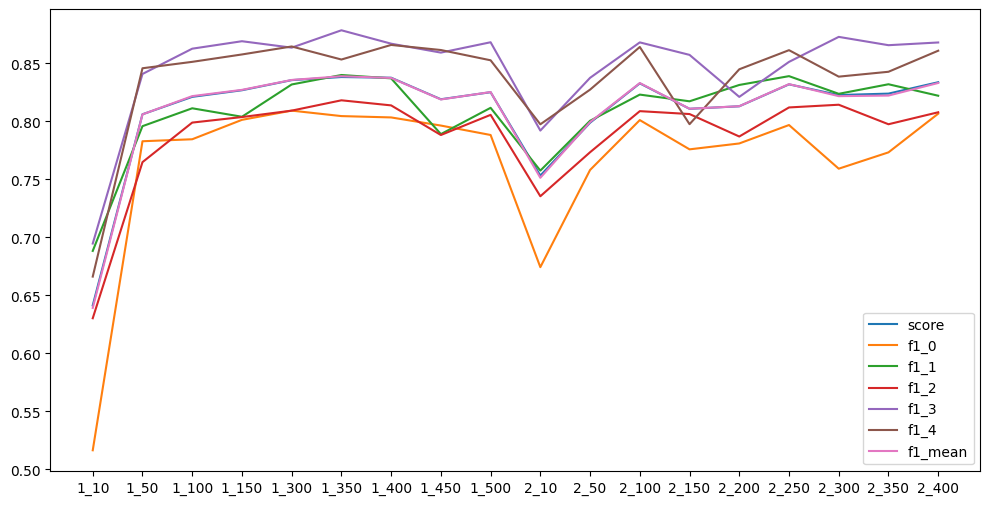

In [48]:
plt.figure(figsize=(12,6))
for i in [ii for ii in optimied_df.columns if ii not in ['lstm_units']]:
    plt.plot(optimied_df['lstm_units'],optimied_df[i],label=i)


plt.legend()
plt.show()

## the LSTM model with 2 layers and 350 units works gives the highest accuracy! Also the variance between the f1 scores is reduced.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
del X
del y
gc.collect()

5853

In [50]:
lstm_model = Sequential()
lstm_model.add(LSTM(350,return_sequences=True))
lstm_model.add(LSTM(350))
lstm_model.add(Dense(5,activation='softmax'))
lstm_model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
hist = lstm_model.fit(X_train,y_train,validation_split=0.3,epochs=500,callbacks=callback)
gc.collect()

Epoch 1/500
2381/2381 [==============================] - 3657s 2s/step - loss: 0.4798 - accuracy: 0.8303 - val_loss: 0.3827 - val_accuracy: 0.8645
Epoch 2/500
2381/2381 [==============================] - 3837s 2s/step - loss: 0.3624 - accuracy: 0.8707 - val_loss: 0.3508 - val_accuracy: 0.8756
Epoch 2: early stopping


46166

In [52]:
y_pred = lstm_model.predict(X_test)
gc.collect()

1675/1675 [==============================] - 859s 513ms/step


692

In [53]:
y_pred = multiclass_binary_conversion(y_pred,5)

In [54]:
np.mean(correct_classification(np.array(y_test),y_pred))

0.8743376371370998

In [55]:
accuracy_score(y_test,y_pred)

0.8743376371370998

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      5151
           1       0.92      0.93      0.92     30043
           2       0.77      0.79      0.78      7727
           3       0.85      0.83      0.84      6207
           4       0.88      0.86      0.87      4468

   micro avg       0.87      0.87      0.87     53596
   macro avg       0.84      0.83      0.84     53596
weighted avg       0.87      0.87      0.87     53596
 samples avg       0.87      0.87      0.87     53596



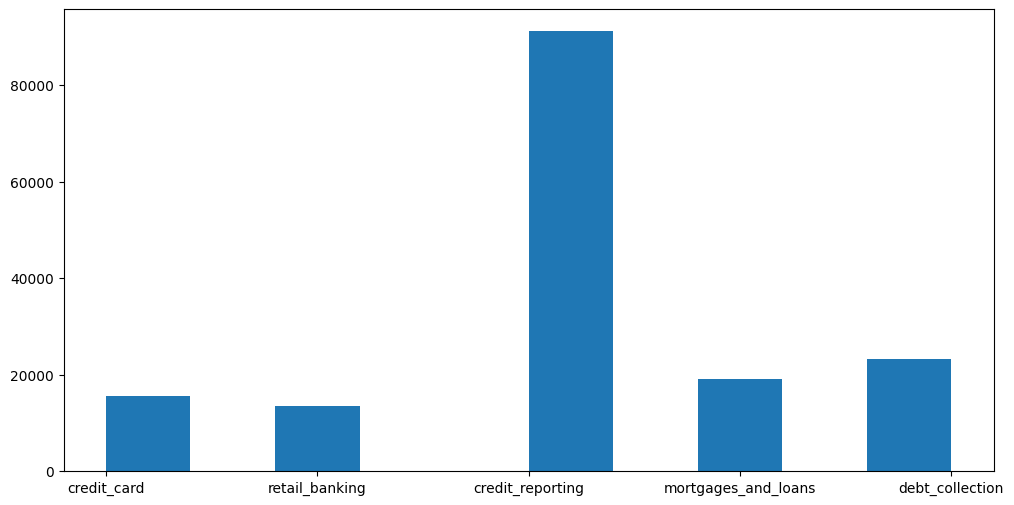

In [57]:
plt.figure(figsize=(12,6))
plt.hist(df['product'])
plt.show()

<font size =4>
    <h2>the model accuracy is around 87% which is a really good number. </h2>
    <ul>
        <li> the lowest of the f1 score is for "credit reporting" (78%)</li>
        <li> The weighted mean of the f1 score is still good at about 87%</li>
            

In [58]:
def get_label(y,columns,labels):
    y = pd.DataFrame(y,columns=labels)
    odd_col = [i for i in columns if i not in labels]
    return np.array(y[y==1].stack().reset_index()['level_1'])
    

# This LSTM model can classify the type of the complaint based on the contents of the message with 87% accuracy.